# Working with data

In [18]:
# Print all the interactive output without resorting to print, not only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import webbrowser
website = 'https://en.wikipedia.org/wiki/List_of_all-time_NFL_win%E2%80%93loss_records'
#data = pd.read_html(website, header =0, flavor = 'bs4')
data = pd.read_html(website, header =0)
nfl_frame = data[1]
nfl_frame = nfl_frame.head()
nfl_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,882,502,374,6,0.573,1960,NFC East
1,2,Green Bay Packers,1336,737,562,37,0.565,1921,NFC North
2,3,Chicago Bears,1370,749,579,42,0.562,1920,NFC North
3,4,Miami Dolphins,800,445,351,4,0.559,1966,AFC East
4,5,New England Patriots[b],884,489,386,9,0.558,1960,AFC East


In [19]:
# Export to CSV
nfl_frame.to_csv('nfl_info.csv', sep=',', index=False)

In [20]:

import sys
nfl_frame.to_csv(sys.stdout, sep=',')

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,882,502,374,6,0.573,1960,NFC East
1,2,Green Bay Packers,1336,737,562,37,0.565,1921,NFC North
2,3,Chicago Bears,1370,749,579,42,0.562,1920,NFC North
3,4,Miami Dolphins,800,445,351,4,0.5589999999999999,1966,AFC East
4,5,New England Patriots[b],884,489,386,9,0.5579999999999999,1960,AFC East


In [21]:
pd.read_csv('nfl_info.csv')

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,882,502,374,6,0.573,1960,NFC East
1,2,Green Bay Packers,1336,737,562,37,0.565,1921,NFC North
2,3,Chicago Bears,1370,749,579,42,0.562,1920,NFC North
3,4,Miami Dolphins,800,445,351,4,0.559,1966,AFC East
4,5,New England Patriots[b],884,489,386,9,0.558,1960,AFC East


In [23]:
#Limit number of rows

pd.read_csv('nfl_info.csv', nrows=3)

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,882,502,374,6,0.573,1960,NFC East
1,2,Green Bay Packers,1336,737,562,37,0.565,1921,NFC North
2,3,Chicago Bears,1370,749,579,42,0.562,1920,NFC North


In [49]:
dframe = DataFrame(np.arange(9).reshape(3,3), index=['SF', 'LA', 'SD'], columns=['D1', 'D2', 'D3'])
dframe
dframe.to_csv('ex1.csv')

# Specify that 0 th col is the index column.
pd.read_csv('ex1.csv', index_col=0)

,D1,D2,D3
SF,0,1,2
LA,3,4,5
SD,6,7,8


,D1,D2,D3
SF,0,1,2
LA,3,4,5
SD,6,7,8


In [55]:
# Selectively write a column out
dframe.to_csv('ex2.csv', columns=['D2'])
pd.read_csv('ex2.csv', index_col=0)

,D2
SF,1
LA,4
SD,7


### Json object

In [120]:
json_obj = """
{
    "name":"John",
    "age":30,
    "cars": [
    {
        "car1":"Ford",
        "car2":"BMW",
        "car3":"Fiat"
    },
    {
        "car1":"Toyota",
        "car2":"Nissan",
        "car3":"Tesla"
    }
    ]
 }
"""

import json
data = json.loads(json_obj)
data

{'age': 30,
 'cars': [{'car1': 'Ford', 'car2': 'BMW', 'car3': 'Fiat'},
  {'car1': 'Toyota', 'car2': 'Nissan', 'car3': 'Tesla'}],
 'name': 'John'}

In [122]:
json.dumps(data)

'{"cars": [{"car2": "BMW", "car1": "Ford", "car3": "Fiat"}, {"car2": "Nissan", "car1": "Toyota", "car3": "Tesla"}], "age": 30, "name": "John"}'

In [123]:
DataFrame(data['cars'])

,car1,car2,car3
0,Ford,BMW,Fiat
1,Toyota,Nissan,Tesla


### HTML support

In [136]:
url = 'https://www.fdic.gov/bank/individual/failed/banklist.html'
dframe_list = pd.read_html(url)
dframe = dframe_list[0]
dframe.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

### XLS file

In [140]:
xlsfile = pd.ExcelFile('Sample.xlsx')

In [141]:
dframe = xlsfile.parse('Sheet1')

In [143]:
dframe.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


### Data frame merge

In [174]:
from random import shuffle
df1 = DataFrame({'key':list('ZABCDEFZ'), 'values1':[10, 0, 1, 2, 3, 4, 5, 88]})
df2 = DataFrame({'key':list('ZABCSZ'), 'values2':[11, 0, 1, 3, 8, 89]})
df1
df2
print("Common items are merged :")
pd.merge(df1,df2) # Same as pd.merge(df1, df2, on='key')



,key,values1
0,Z,10
1,A,0
2,B,1
3,C,2
4,D,3
5,E,4
6,F,5
7,Z,88


,key,values2
0,Z,11
1,A,0
2,B,1
3,C,3
4,S,8
5,Z,89


Common items are merged :


,key,values1,values2
0,Z,10,11
1,Z,10,89
2,Z,88,11
3,Z,88,89
4,A,0,0
5,B,1,1
6,C,2,3


In [175]:
# Choose any data frame and choose whose key columns to use
pd.merge(df1, df2, on='key', how='left')

,key,values1,values2
0,Z,10,11.0
1,Z,10,89.0
2,A,0,0.0
3,B,1,1.0
4,C,2,3.0
5,D,3,NaN
6,E,4,NaN
7,F,5,NaN
8,Z,88,11.0
9,Z,88,89.0


In [177]:
# Choose any data frame and choose whose key columns to use
pd.merge(df1, df2, on='key', how='right')

,key,values1,values2
0,Z,10.0,11
1,Z,88.0,11
2,Z,10.0,89
3,Z,88.0,89
4,A,0.0,0
5,B,1.0,1
6,C,2.0,3
7,S,NaN,8


In [178]:
# Union of both the data frames
pd.merge(df1, df2, on='key', how='outer')

,key,values1,values2
0,Z,10.0,11.0
1,Z,10.0,89.0
2,Z,88.0,11.0
3,Z,88.0,89.0
4,A,0.0,0.0
5,B,1.0,1.0
6,C,2.0,3.0
7,D,3.0,NaN
8,E,4.0,NaN
9,F,5.0,NaN


In [180]:
# Another example
df3 = DataFrame({'key':list('XXXYZZ'), 'values1':np.arange(6)})
df4 = DataFrame({'key':list('YYXXZ'), 'values2':np.arange(5)})
df3
df4

,key,values1
0,X,0
1,X,1
2,X,2
3,Y,3
4,Z,4
5,Z,5


,key,values2
0,Y,0
1,Y,1
2,X,2
3,X,3
4,Z,4


In [185]:
pd.merge(df3, df4)

,key,values1,values2
0,X,0,2
1,X,0,3
2,X,1,2
3,X,1,3
4,X,2,2
5,X,2,3
6,Y,3,0
7,Y,3,1
8,Z,4,4
9,Z,5,4


### Merge data frame by keys

In [198]:
df_left = DataFrame({'key1' : ['Shaji', 'Roshni', 'Nida', 'Naina', 'Naina'], 
                     'key2' : [40, 37, 11, 3, 13],
                     'left_data' : ['good', 'good', 'bad', 'better', 'better']})
df_left
df_right = DataFrame({'key1' : ['Shaji', 'Shaji', 'Roshni', 'Nida', 'Naina', 'Naina'], 
                     'key2' : [40, 13, 11, 3, 44, 13],
                     'right_data' : ['good', 'bad', 'good', 'bad', 'better', 'better']})
df_right

,key1,key2,left_data
0,Shaji,40,good
1,Roshni,37,good
2,Nida,11,bad
3,Naina,3,better
4,Naina,13,better


,key1,key2,right_data
0,Shaji,40,good
1,Shaji,13,bad
2,Roshni,11,good
3,Nida,3,bad
4,Naina,44,better
5,Naina,13,better


In [201]:
# Merge by two keys
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')

,key1,key2,left_data,right_data
0,Shaji,40,good,good
1,Roshni,37,good,NaN
2,Nida,11,bad,NaN
3,Naina,3,better,NaN
4,Naina,13,better,better
5,Shaji,13,NaN,bad
6,Roshni,11,NaN,good
7,Nida,3,NaN,bad
8,Naina,44,NaN,better


In [204]:
# Merge by one key. The other keys are automatically suffixed
pd.merge(df_left, df_right, on=['key1'], how='outer')

,key1,key2_x,left_data,key2_y,right_data
0,Shaji,40,good,40,good
1,Shaji,40,good,13,bad
2,Roshni,37,good,11,good
3,Nida,11,bad,3,bad
4,Naina,3,better,44,better
5,Naina,3,better,13,better
6,Naina,13,better,44,better
7,Naina,13,better,13,better


In [207]:
# Merge by one key. The other keys are automatically suffixed, 
# Key suffixed explicitluy given.
pd.merge(df_left, df_right, on=['key1'], how='outer', suffixes=('__lefty', '__righty'))

,key1,key2__lefty,left_data,key2__righty,right_data
0,Shaji,40,good,40,good
1,Shaji,40,good,13,bad
2,Roshni,37,good,11,good
3,Nida,11,bad,3,bad
4,Naina,3,better,44,better
5,Naina,3,better,13,better
6,Naina,13,better,44,better
7,Naina,13,better,13,better


### Merge/Join data frame by index

In [211]:
df_left = DataFrame({'key1'  : ['X', 'Y', 'Z', 'X', 'Y'], 'data1' : range(5)})
df_right = DataFrame({'group_data' : [10, 11]}, index=['X', 'Y'])
df_left
df_right

,data1,key1
0,0,X
1,1,Y
2,2,Z
3,3,X
4,4,Y


,group_data
X,10
Y,11


In [217]:
# Merge left frame using key1 and right frame using index
pd.merge(df_left, df_right, left_on='key1', right_index=True)

,data1,key1,group_data
0,0,X,10
3,3,X,10
1,1,Y,11
4,4,Y,11


In [230]:
df_left = DataFrame({'key1' : ['SF', 'SF', 'SF', 'LA', 'LA'],
                     'key2' : [10,    20,   30,   20,   30],
                    'data_set' : np.arange(5)})
df_left

df_right = DataFrame(np.arange(10).reshape(5,2),
                     index=[['LA', 'LA', 'SF', 'SF', 'SF'], 
                            [20,    10,   10,   10,   20]], columns=['col_1', 'col_2'])

df_right

,data_set,key1,key2
0,0,SF,10
1,1,SF,20
2,2,SF,30
3,3,LA,20
4,4,LA,30


col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [232]:
# Merges data frames with hierarchical index
pd.merge(df_left, df_right, left_on=['key1', 'key2'], right_index=True)

,data_set,key1,key2,col_1,col_2
0,0,SF,10,4,5
0,0,SF,10,6,7
1,1,SF,20,8,9
3,3,LA,20,0,1


In [238]:
df_left = DataFrame({'key1'  : ['X', 'Y', 'Z', 'X', 'Y'], 'data1' : range(5)})
df_right = DataFrame({'group_data' : [10, 11]}, index=['X', 'Y'])
df_left
df_right

# Default method of joining (MOSTLY using JOIN, use specific options in merge also as in join)

df_left.join(df_right)

,data1,key1
0,0,X
1,1,Y
2,2,Z
3,3,X
4,4,Y


,group_data
X,10
Y,11


,data1,key1,group_data
0,0,X,NaN
1,1,Y,NaN
2,2,Z,NaN
3,3,X,NaN
4,4,Y,NaN


### Concatinate Matrixes and data frames


In [244]:
m1 = np.arange(9).reshape(3,3)
m1
np.concatenate([m1,m1]) # same as np.concatenate([m1,m1], axis=0)
np.concatenate([m1,m1], axis=1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [254]:
s1 = Series([1, 2, 3], index=['A', 'B', 'C'])
s1
s2 = Series([2, 3], index=['A', 'Q'])
s2
pd.concat([s1, s2])

# Hierarchically name series so that we can remembetr which one is which
pd.concat([s1, s2], keys=['s1_key', 's2_key'])

A    1
B    2
C    3
dtype: int64

A    2
Q    3
dtype: int64

A    1
B    2
C    3
A    2
Q    3
dtype: int64

s1_key  A    1
        B    2
        C    3
s2_key  A    2
        Q    3
dtype: int64

In [256]:
# Series is converetd to a data frame
pd.concat([s1, s2], axis=1, sort=False)

,s1_key,s2_key
A,1.0,2.0
B,2.0,NaN
C,3.0,NaN
Q,NaN,3.0


In [257]:
pd.concat([s1, s2], axis=1, sort=False, keys=['s1_key', 's2_key'])

,s1_key,s2_key
A,1.0,2.0
B,2.0,NaN
C,3.0,NaN
Q,NaN,3.0


In [264]:
df1 = DataFrame(np.random.randn(4,3), columns=['X', 'Y', 'Z'])
df2 = DataFrame(np.random.randn(3,3), columns=['Z', 'A', 'X'])
df1
df2
pd.concat([df1, df2], sort=False)

,X,Y,Z
0,-0.362017,2.777648,-0.436985
1,0.180660,0.623298,0.633216
2,-0.033518,-1.028464,0.514251
3,-0.002213,-0.119465,0.810524


,Z,A,X
0,-0.487977,-1.865589,-1.304093
1,-0.487250,1.142663,-0.660492
2,-0.558238,0.899295,0.200521


,X,Y,Z,A
0,-0.362017,2.777648,-0.436985,NaN
1,0.180660,0.623298,0.633216,NaN
2,-0.033518,-1.028464,0.514251,NaN
3,-0.002213,-0.119465,0.810524,NaN
0,-1.304093,NaN,-0.487977,-1.865589
1,-0.660492,NaN,-0.487250,1.142663
2,0.200521,NaN,-0.558238,0.899295


In [266]:
# To fix indexing
pd.concat([df1, df2], sort=False, ignore_index=True)

,X,Y,Z,A
0,-0.362017,2.777648,-0.436985,NaN
1,0.180660,0.623298,0.633216,NaN
2,-0.033518,-1.028464,0.514251,NaN
3,-0.002213,-0.119465,0.810524,NaN
4,-1.304093,NaN,-0.487977,-1.865589
5,-0.660492,NaN,-0.487250,1.142663
6,0.200521,NaN,-0.558238,0.899295


### Combine data frames

In [274]:
s1 = Series([2, np.nan, 3, np.nan, 4, np.nan], index=list('PQRSTU'))
s1
len(s1)
s2 = Series(np.arange(len(s1)), dtype=np.float64, index=list('PQRSTU'))
s2

P    2.0
Q    NaN
R    3.0
S    NaN
T    4.0
U    NaN
dtype: float64

6

P    0.0
Q    1.0
R    2.0
S    3.0
T    4.0
U    5.0
dtype: float64

In [278]:
# Create a new series where Values from Series 2 is chosen if Corresponding value in Series 2 is not defined or null.
Series(np.where(pd.isnull(s1), s2, s1), index= s1.index)

# Same stuff below
s1.combine_first(s2)

P    2.0
Q    1.0
R    3.0
S    3.0
T    4.0
U    5.0
dtype: float64

P    2.0
Q    1.0
R    3.0
S    3.0
T    4.0
U    5.0
dtype: float64

In [285]:
nan = np.nan
dframe_odds = DataFrame({'X' : [1.0, nan, 3.0, nan],
                         'Y' : [nan, 3.0, nan, 5.0],
                         'Z' : [nan, 4.0, nan, 7.0]})

dframe_even = DataFrame({'X' : [nan, nan, 4.0, 10.0, 12],
                         'Y' : [nan, 3.3, 4.0, 5.0,  13]})

dframe_odds
dframe_even

,X,Y,Z
0,1.0,NaN,NaN
1,NaN,3.0,4.0
2,3.0,NaN,NaN
3,NaN,5.0,7.0


,X,Y
0,NaN,NaN
1,NaN,3.3
2,4.0,4.0
3,10.0,5.0
4,12.0,13.0


In [286]:
dframe_odds.combine_first(dframe_even)

,X,Y,Z
0,1.0,NaN,NaN
1,NaN,3.0,4.0
2,3.0,4.0,NaN
3,10.0,5.0,7.0
4,12.0,13.0,NaN


### Reshaping

In [313]:
df1 = DataFrame(np.arange(8).reshape(2,4), index=['LA', 'SF'], columns=['A', 'B', 'C', 'D'])
df1

# Note below, name index & columns specifically
df1 = DataFrame(np.arange(8).reshape(2,4), index=pd.Index(['LA', 'SF'], name='city'), 
                                           columns=pd.Index(['A', 'B', 'C', 'D'], name='class')
               )
df1

,A,B,C,D
LA,0,1,2,3
SF,4,5,6,7


class,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [302]:
# Convert above to stack 
df2 = df1.stack()
df2

city  class
LA    A        0
      B        1
      C        2
      D        3
SF    A        4
      B        5
      C        6
      D        7
dtype: int64

### unstack stuff convert Series to data frame

In [311]:
# Different ways of unstacking

orig1 = df2.unstack() # Default
orig1

orig2 = df2.unstack('class')
orig2

orig3 = df2.unstack('city')
orig3


class,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


class,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


city,LA,SF
class,,
A,0,4
B,1,5
C,2,6
D,3,7


In [ ]:
# Another example
s1 = Series([0, 1, 3], index=['A', 'B', 'C'])
s2 = Series([4, 5, 6], index=['X', 'Y', 'Z'])

In [320]:
dframe = pd.concat([s1, s2], keys=['alpha', 'beta'])
dframe
dframe.unstack()

alpha  P    2.0
       Q    NaN
       R    3.0
       S    NaN
       T    4.0
       U    NaN
beta   P    0.0
       Q    1.0
       R    2.0
       S    3.0
       T    4.0
       U    5.0
dtype: float64

,P,Q,R,S,T,U
alpha,2.0,NaN,3.0,NaN,4.0,NaN
beta,0.0,1.0,2.0,3.0,4.0,5.0


In [324]:
# Got rid off Null values
dframe.unstack().stack()

alpha  P    2.0
       R    3.0
       T    4.0
beta   P    0.0
       Q    1.0
       R    2.0
       S    3.0
       T    4.0
       U    5.0
dtype: float64

In [326]:
# Keep Null values during stacking
dframe.unstack().stack(dropna=False)

alpha  P    2.0
       Q    NaN
       R    3.0
       S    NaN
       T    4.0
       U    NaN
beta   P    0.0
       Q    1.0
       R    2.0
       S    3.0
       T    4.0
       U    5.0
dtype: float64

### Pivot tables and manipulation

In [328]:
import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df = unpivot(tm.makeTimeDataFrame())

In [329]:
df

,date,variable,value
0,2000-01-03,A,-0.871561
1,2000-01-04,A,-0.707396
2,2000-01-05,A,-1.359861
3,2000-01-03,B,1.607815
4,2000-01-04,B,0.211098
5,2000-01-05,B,1.520068
6,2000-01-03,C,-0.233798
7,2000-01-04,C,1.427002
8,2000-01-05,C,0.728532
9,2000-01-03,D,0.476363


In [333]:
dframe_p = df.pivot('date', 'variable', 'value')
dframe_p

variable,A,B,C,D
date,,,,
2000-01-03,-0.871561,1.607815,-0.233798,0.476363
2000-01-04,-0.707396,0.211098,1.427002,-0.877641
2000-01-05,-1.359861,1.520068,0.728532,-0.760938


In [334]:
dframe_p = df.pivot('variable', 'date', 'value')
dframe_p

date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00
variable,,,
A,-0.871561,-0.707396,-1.359861
B,1.607815,0.211098,1.520068
C,-0.233798,1.427002,0.728532
D,0.476363,-0.877641,-0.760938


### Finding duplicates

In [340]:
df = DataFrame({'key1' : ['A'] * 3 + ['B'] * 2, 
               'key2' :  [1, 1, 2, 2, 2]})
df

,key1,key2
0,A,1
1,A,1
2,A,2
3,B,2
4,B,2


In [341]:
df.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [342]:
df.drop_duplicates()

,key1,key2
0,A,1
2,A,2
3,B,2


In [345]:
# Duplicate looking at only key1, ignore other column
df.drop_duplicates('key1')

,key1,key2
0,A,1
3,B,2


In [362]:
# Keep the last one
df.drop_duplicates(['key1'], keep='last')

,key1,key2
2,A,2
4,B,2


### Mapping

In [366]:
dframe = DataFrame({ 'city' : ['Denver', 'Tahoe', 'Fox Park'], 
                   'altitude' : [5000, 7000, 6000]})
dframe

state_map = {'Denver' : 'CO', 'Tahoe' : 'CA', 'Fox Park' : 'WY'}

,altitude,city
0,5000,Denver
1,7000,Tahoe
2,6000,Fox Park


In [371]:
dframe['state'] = dframe['city'].map(state_map)
dframe

,altitude,city,state
0,5000,Denver,CO
1,7000,Tahoe,CA
2,6000,Fox Park,WY


### Replace

In [372]:
s1 = Series([1, 2, 3, 4, 5, 6])
s1

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [377]:
# Different ways of replacement
s1.replace(2, 100)
s1.replace([1,3,4], [100, 300, np.nan])
s1.replace({1:100, 3:300, 4:np.nan})

0      1
1    100
2      3
3      4
4      5
5      6
dtype: int64

0    100.0
1      2.0
2    300.0
3      NaN
4      5.0
5      6.0
dtype: float64

0    100.0
1      2.0
2    300.0
3      NaN
4      5.0
5      6.0
dtype: float64

### Rename Index

In [379]:
df = DataFrame(np.arange(12).reshape(3,4), index=['NY', 'SF', 'LA'], columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
NY,0,1,2,3
SF,4,5,6,7
LA,8,9,10,11


In [385]:
df.index.map(str.lower)
df.index = df.index.map(str.lower)
df

Index(['ny', 'sf', 'la'], dtype='object')

,A,B,C,D
ny,0,1,2,3
sf,4,5,6,7
la,8,9,10,11


In [387]:
# Another way to change index
df.rename(index=str.title, columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
Sf,4,5,6,7
La,8,9,10,11


In [392]:
# Rename index using dictionary
df.rename(index={'ny' : 'New York'}, columns={'A' : 'Col A'})

,Col A,B,C,D
New York,0,1,2,3
sf,4,5,6,7
la,8,9,10,11


In [394]:
# The effects are permanent 
df.rename(index={'ny' : 'New York'}, columns={'A' : 'Col A'}, inplace=True)
df

,Col A,B,C,D
New York,0,1,2,3
sf,4,5,6,7
la,8,9,10,11


### Binning

In [435]:
years = [1920, 1945, 1947, 1932, 1950, 1952, 1960, 1970, 1978, 1982, 1984, 1994, 1996, 2000, 2007, 2008, 2010, 2015, 2018]

# Bins are specifically given
decade_bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [432]:
# Usage of cut during binning
decade_cat = pd.cut(years, decade_bins)
decade_cat

[NaN, NaN, NaN, NaN, NaN, ..., (2000, 2010], (2000, 2010], (2000, 2010], (2010, 2020], (2010, 2020]]
Length: 19
Categories (6, interval[int64]): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [433]:
# Various categories
decade_cat.categories

# Count of values after catergorizing
pd.value_counts(decade_cat)

IntervalIndex([(1960, 1970], (1970, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]
              closed='right',
              dtype='interval[int64]')

(2000, 2010]    3
(1990, 2000]    3
(2010, 2020]    2
(1980, 1990]    2
(1970, 1980]    1
(1960, 1970]    1
dtype: int64

In [434]:
# All the years have been seperated to two bins
years = [1920, 1945, 1947, 1932, 1950, 1952, 1960, 1970, 1978, 1982, 1984, 1994, 1996, 2000, 2007, 2008, 2010, 2018]
cat1 = pd.cut(years, 2, precision=10)
pd.value_counts(cat1)

(1969.0, 2018.0]      11
(1919.902, 1969.0]     7
dtype: int64

### Outliers

In [487]:
# Example to mask and change

p = pd.DataFrame({('A','a'): [-1,-1,0,10,12],
                   ('A','b'): [0,1,2,3,-1],
                   ('B','a'): [-20,-10,0,10,20],
                   ('B','b'): [-200,-100,0,100,200]})
p
mask = p.loc[:]<0
p[mask] = 1000
p

A      B     
    a  b   a    b
0  -1  0 -20 -200
1  -1  1 -10 -100
2   0  2   0    0
3  10  3  10  100
4  12 -1  20  200

A           B      
      a     b     a     b
0  1000     0  1000  1000
1  1000     1  1000  1000
2     0     2     0     0
3    10     3    10   100
4    12  1000    20   200

In [488]:
# Set the seed
np.random.seed(121)
dframe = DataFrame(np.random.randn(1000, 5))
dframe.tail(5)
dframe.describe()


,0,1,2,3,4
995,-0.248993,-1.115941,1.221382,-0.612923,-0.624475
996,-1.503698,-0.551798,0.274381,-1.434213,-0.645870
997,0.005995,0.986780,0.857497,-0.404912,0.257369
998,-0.288022,0.706137,0.968335,0.095745,-0.346555
999,2.716435,-0.778378,-1.672083,0.921200,-0.442752


,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.021112,0.038593,0.006277,-0.059067,0.004419
std,0.980387,0.966066,1.000785,1.015655,0.974547
min,-3.323077,-3.114181,-3.128605,-3.115493,-3.086725
25%,-0.684640,-0.619178,-0.679796,-0.762688,-0.659915
50%,-0.010707,0.080275,0.005014,-0.031701,0.006989
75%,0.617550,0.678637,0.740354,0.663533,0.666588
max,3.468182,2.964517,3.140857,3.114197,3.573283


In [489]:
col_0 = dframe[0]
col_0.tail()

# Show me the values of this Series that is > 3
col_0[np.abs(col_0) > 3]


995   -0.248993
996   -1.503698
997    0.005995
998   -0.288022
999    2.716435
Name: 0, dtype: float64

182    3.261271
389   -3.323077
647    3.468182
Name: 0, dtype: float64

In [490]:
# Do same to the entire frame
dframe[(np.abs(dframe) > 3).any(1)].head()

,0,1,2,3,4
4,0.504114,0.607406,1.166450,0.824424,-3.086725
30,1.278850,0.332369,0.722183,3.015557,-0.009070
47,-0.054551,2.305346,-3.045790,-0.469081,0.043970
143,0.630899,-0.292191,-1.067436,-3.007309,1.052189
182,3.261271,0.385172,-0.156880,0.775787,-0.682011


In [497]:
# Cap such  values to 3. Application of loc

#mask = p.loc[:]<0
#p[mask] = 1000

# Get True / false array
mask = np.abs(dframe[:]) > 3

dframe[mask] = np.sign(dframe)*3

# Print the 4-th row 
dframe.loc[4,:]


dframe.describe()

0    0.504114
1    0.607406
2    1.166450
3    0.824424
4   -3.000000
Name: 4, dtype: float64

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.021519,0.038720,0.006310,-0.059115,0.003966
std,0.976948,0.965657,0.999819,1.014599,0.971953
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.684640,-0.619178,-0.679796,-0.762688,-0.659915
50%,-0.010707,0.080275,0.005014,-0.031701,0.006989
75%,0.617550,0.678637,0.740354,0.663533,0.666588
max,3.000000,2.964517,3.000000,3.000000,3.000000


### Permutation

In [506]:
blender = np.random.permutation(4)
blender

array([2, 1, 0, 3])

In [507]:
dframe = DataFrame(np.arange(16).reshape(4,4))
dframe

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [508]:
# Usage of take method, it changed the indexing as per the blender
dframe.take(blender)

,0,1,2,3
2,8,9,10,11
1,4,5,6,7
0,0,1,2,3
3,12,13,14,15


In [516]:
# Create an array of random inregers between 0 and 3 of size 10
shaker = np.random.randint(0, 4, size=10)
shaker

array([3, 3, 2, 1, 1, 0, 0, 0, 3, 3])

### Group by on dataframes

In [520]:
dframe = DataFrame({'key1' : ['A', 'B', 'A', 'C', 'B'],
                    'key2'  : ['alpha', 'beta', 'beta', 'alpha', 'beta'], 
                    'val1' : np.random.randn(5),
                    'val2' : np.random.randn(5)})
dframe

,key1,key2,val1,val2
0,A,alpha,0.426237,-0.387923
1,B,beta,-0.769191,-0.229232
2,A,beta,-1.493212,-0.144502
3,C,alpha,-1.616782,-0.311907
4,B,beta,0.564449,-1.041708


In [526]:
group1 = dframe['val1'].groupby(dframe['key1'])


In [560]:
df = pd.DataFrame()
pet_list = ['cat', 'hamster', 'alligator', 'snake']

is_mammal = {'cat' : 'mammal', 'hamster' : 'mammal', 'alligator' : 'reptile', 'snake' : 'reptile' }



{'alligator': 'reptile',
 'cat': 'mammal',
 'hamster': 'mammal',
 'snake': 'reptile'}

,animal,age,weight,length,type
0,snake,8,13,6,reptile
1,hamster,7,9,3,mammal
2,hamster,14,13,7,mammal
3,alligator,2,12,6,reptile
4,hamster,10,11,1,mammal
5,hamster,6,13,3,mammal
6,alligator,3,7,9,reptile
7,hamster,6,9,3,mammal
8,cat,8,8,5,mammal
9,hamster,4,5,4,mammal


animal
alligator    11.250000
cat           8.000000
hamster      10.000000
snake         8.333333
Name: weight, dtype: float64

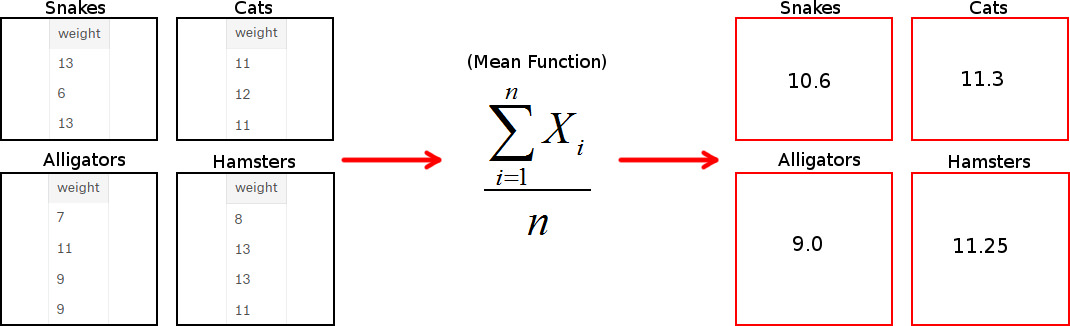

In [573]:

pet = [np.random.choice(pet_list) for i in range(1,15)]
        
# Random weight of animal column
weight = [np.random.choice(range(5,15)) for i in range(1,15)]
        
# Random length of animals column
length = [np.random.choice(range(1,10)) for i in range(1,15)]
        
# random age of the animals column
age = [np.random.choice(range(1,15)) for i in range(1,15)]

df['animal'] = pet
df['age']    = age
df['weight'] = weight
df['length'] = length

df['type'] = df['animal'].map(is_mammal)

df


#The above data is classified into various animal buckets. Further operations can be done on it.
animal_groups = df.groupby("animal")
animal_groups['weight'].mean()

from IPython.display import Image
Image("xZnMuPZ.jpg", width=700)


In [713]:
# This shows age, weight and length together.
df.groupby("animal").mean()

# Another grouping, shows age, weight and length
df.groupby("type").mean()

#How to view the statistics of groupby
df.groupby("animal").describe()

,age,weight,length
animal,,,
alligator,5.250000,11.250000,4.500000
cat,8.000000,8.000000,5.000000
hamster,7.833333,10.000000,3.500000
snake,9.000000,8.333333,5.666667


,age,weight,length
type,,,
mammal,7.857143,9.714286,3.714286
reptile,6.857143,10.000000,5.000000


age                                                 length  \
          count      mean       std  min  25%  50%    75%   max  count   
animal                                                                   
alligator   4.0  5.250000  5.852350  2.0  2.0  2.5   5.75  14.0    4.0   
cat         1.0  8.000000       NaN  8.0  8.0  8.0   8.00   8.0    1.0   
hamster     6.0  7.833333  3.600926  4.0  6.0  6.5   9.25  14.0    6.0   
snake       3.0  9.000000  3.605551  6.0  7.0  8.0  10.50  13.0    3.0   

                     ...             weight                                   \
               mean  ...    75%  max  count       mean       std  min    25%   
animal               ...                                                       
alligator  4.500000  ...   6.75  9.0    4.0  11.250000  2.986079  7.0  10.75   
cat        5.000000  ...   5.00  5.0    1.0   8.000000       NaN  8.0   8.00   
hamster    3.500000  ...   3.75  7.0    6.0  10.000000  3.033150  5.0   9.00   
snake      5.666667  ...   7.00  8.0    3.0   8.333333  4.163332  5.0   6.00   

                             
            50%   75%   max  
animal                       
alligator  12.0  12.5  14.0  
cat         8.0   8.0   8.0  
hamster    10.0  12.5  13.0  
snake       7.0  10.0  13.0  

[4 rows x 24 columns]

In [578]:
# Show more data, merge the operations above and show it in a single table
df.groupby(['type','animal']).mean()

age     weight    length
type    animal                                  
mammal  cat        8.000000   8.000000  5.000000
        hamster    7.833333  10.000000  3.500000
reptile alligator  5.250000  11.250000  4.500000
        snake      9.000000   8.333333  5.666667

In [634]:
# Group by 'type' and 'animal' and select the age from the bin. Find means of all ages.
df.groupby(['type','animal'])['age'].mean()

type     animal   
mammal   cat          8.000000
         hamster      7.833333
reptile  alligator    5.250000
         snake        9.000000
Name: age, dtype: float64

In [631]:
# show size
df.groupby(['type','animal']).size()

type     animal   
mammal   cat          1
         hamster      6
reptile  alligator    4
         snake        3
dtype: int64

In [597]:
# Iterate over each groups/bins created.
for name, group in df.groupby('animal'):
    print("Animal Name >>> " + name + '\n')
    print(group)
    print ("\n")

Animal Name >>> alligator

       animal  age  weight  length     type
3   alligator    2      12       6  reptile
6   alligator    3       7       9  reptile
10  alligator   14      12       2  reptile
12  alligator    2      14       1  reptile


Animal Name >>> cat

  animal  age  weight  length    type
8    cat    8       8       5  mammal


Animal Name >>> hamster

    animal  age  weight  length    type
1  hamster    7       9       3  mammal
2  hamster   14      13       7  mammal
4  hamster   10      11       1  mammal
5  hamster    6      13       3  mammal
7  hamster    6       9       3  mammal
9  hamster    4       5       4  mammal


Animal Name >>> snake

   animal  age  weight  length     type
0   snake    8      13       6  reptile
11  snake   13       5       8  reptile
13  snake    6       7       3  reptile




In [603]:
# Another type of iterating, just as above. Shows type as well
df.head()
for (keys, group) in df.groupby(['animal', 'type']):
    print("k1 = %s, k2 = %s\n" %(keys[0], keys[1]))
    print(group)
    print('\n')

,animal,age,weight,length,type
0,snake,8,13,6,reptile
1,hamster,7,9,3,mammal
2,hamster,14,13,7,mammal
3,alligator,2,12,6,reptile
4,hamster,10,11,1,mammal


k1 = alligator, k2 = reptile

       animal  age  weight  length     type
3   alligator    2      12       6  reptile
6   alligator    3       7       9  reptile
10  alligator   14      12       2  reptile
12  alligator    2      14       1  reptile


k1 = cat, k2 = mammal

  animal  age  weight  length    type
8    cat    8       8       5  mammal


k1 = hamster, k2 = mammal

    animal  age  weight  length    type
1  hamster    7       9       3  mammal
2  hamster   14      13       7  mammal
4  hamster   10      11       1  mammal
5  hamster    6      13       3  mammal
7  hamster    6       9       3  mammal
9  hamster    4       5       4  mammal


k1 = snake, k2 = reptile

   animal  age  weight  length     type
0   snake    8      13       6  reptile
11  snake   13       5       8  reptile
13  snake    6       7       3  reptile




In [629]:
# Array to dict convertion
t1 = [('a', 'b'), ('c', 'd')]
dict(t1)

sample_dict = dict(list(df.groupby('animal')))
sample_dict

sample_dict['alligator']

# Seperate the numbers Vs data types, use below
sample_dict = dict(list(df.groupby(df.dtypes, axis=1)))
sample_dict



{'a': 'b', 'c': 'd'}

{'alligator':        animal  age  weight  length     type
 3   alligator    2      12       6  reptile
 6   alligator    3       7       9  reptile
 10  alligator   14      12       2  reptile
 12  alligator    2      14       1  reptile,
 'cat':   animal  age  weight  length    type
 8    cat    8       8       5  mammal,
 'hamster':     animal  age  weight  length    type
 1  hamster    7       9       3  mammal
 2  hamster   14      13       7  mammal
 4  hamster   10      11       1  mammal
 5  hamster    6      13       3  mammal
 7  hamster    6       9       3  mammal
 9  hamster    4       5       4  mammal,
 'snake':    animal  age  weight  length     type
 0   snake    8      13       6  reptile
 11  snake   13       5       8  reptile
 13  snake    6       7       3  reptile}

,animal,age,weight,length,type
3,alligator,2,12,6,reptile
6,alligator,3,7,9,reptile
10,alligator,14,12,2,reptile
12,alligator,2,14,1,reptile


{dtype('int64'):     age  weight  length
 0     8      13       6
 1     7       9       3
 2    14      13       7
 3     2      12       6
 4    10      11       1
 5     6      13       3
 6     3       7       9
 7     6       9       3
 8     8       8       5
 9     4       5       4
 10   14      12       2
 11   13       5       8
 12    2      14       1
 13    6       7       3, dtype('O'):        animal     type
 0       snake  reptile
 1     hamster   mammal
 2     hamster   mammal
 3   alligator  reptile
 4     hamster   mammal
 5     hamster   mammal
 6   alligator  reptile
 7     hamster   mammal
 8         cat   mammal
 9     hamster   mammal
 10  alligator  reptile
 11      snake  reptile
 12  alligator  reptile
 13      snake  reptile}

### Misc operations, organize by sub index. Select using loc

In [700]:
animals = DataFrame(np.random.randint(0, 100, size=30).reshape(6,5), 
                    index=[['large', 'large', 'large', 'large', 'small', 'small'],
                           ['Cat', 'Dog', 'Lion', 'Cow', 'Ant', 'Mouse']],
                    columns=['A', 'B', 'C', 'D', 'E'])
animals

A   B   C   D   E
large Cat    45  47  45  14   2
      Dog    70  82  90  40  81
      Lion   15  33  24  60  41
      Cow    28  92  69  92  24
small Ant     4  42  92  96  23
      Mouse  68  42  21  41   8

In [711]:
animals = DataFrame(np.random.randint(0, 100, size=30).reshape(6,5), 
                    index=['Cat', 'Dog', 'Lion', 'Cow', 'Ant', 'Mouse'],
                    columns=['A', 'B', 'C', 'D', 'E'])
animals
animals.loc[['Cat'],['A']]             = np.nan
animals.loc[['Mouse'],['D']]           = np.nan
animals.loc[['Ant', 'Cow'],['B', 'C']] = np.nan
animals

,A,B,C,D,E
Cat,98,60,31,80,9
Dog,29,94,19,1,64
Lion,33,6,34,83,12
Cow,22,64,79,87,37
Ant,98,68,35,30,2
Mouse,12,40,11,85,19


,A,B,C,D,E
Cat,NaN,60.0,31.0,80.0,9
Dog,29.0,94.0,19.0,1.0,64
Lion,33.0,6.0,34.0,83.0,12
Cow,22.0,NaN,NaN,87.0,37
Ant,98.0,NaN,NaN,30.0,2
Mouse,12.0,40.0,11.0,NaN,19
